# Density

## Experimental data: per paper

total number of points = 4224
data ranges: 
Pressures between: [6079.0, 950000000.0]
Temperatures between: [195.48, 723.15]
Densities between: [0.1990364470446495, 828.7]

saturation ranges: 
Pressures between: [133.322, 11302803.75]
Temperatures between: [159.8, 405.6]



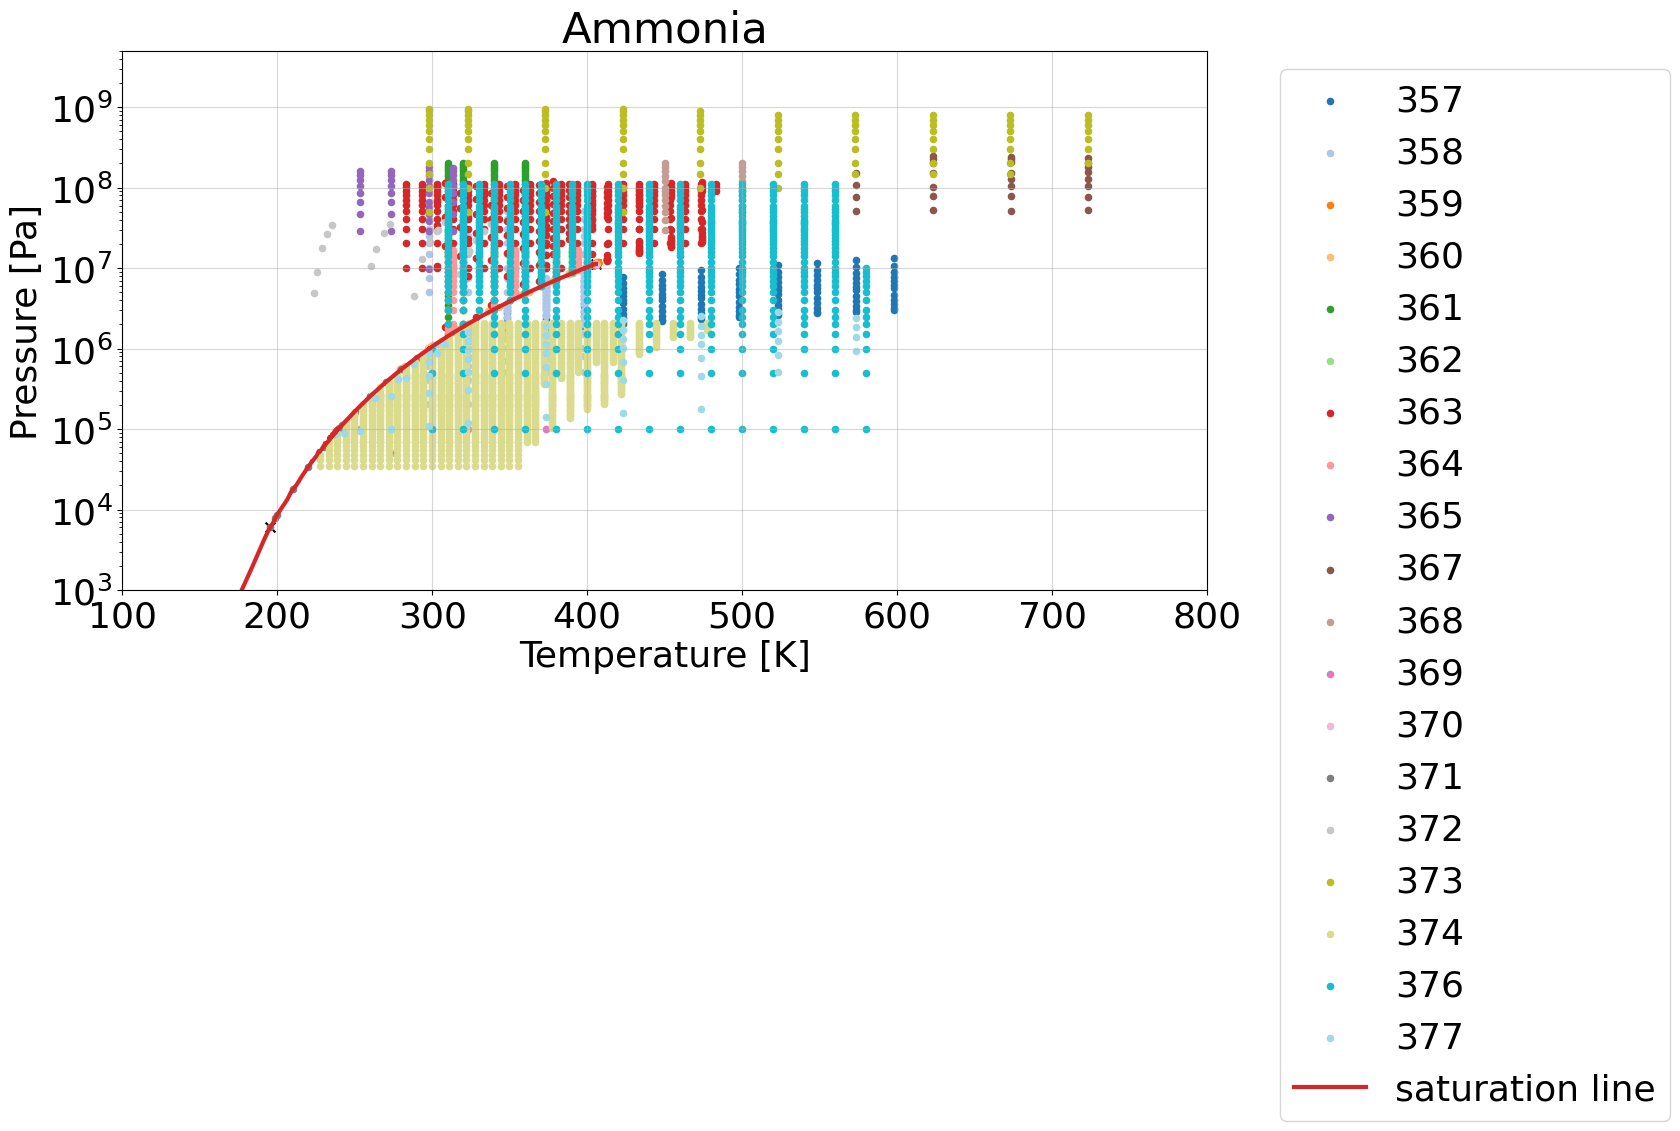

In [8]:
#09/01/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from purefluid import NH3

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

#data
df = pd.read_excel("dataframes/ammonia_density.xlsx")

#saturation data
saturation = pd.read_excel("dataframes/ammonia_saturation.xlsx").sort_values(by=["T"])
saturation_pressure = saturation["P"]
saturation_temperature = saturation["T"]

print(f"total number of points = {len(df)}")
#range of P T rho variables
print("data ranges: ")
print(f"Pressures between: [{min(df['P'])}, {max(df['P'])}]")
print(f"Temperatures between: [{min(df['T'])}, {max(df['T'])}]")
print(f"Densities between: [{min(df['rho'])}, {max(df['rho'])}]")
print("")

#saturation ranges
print("saturation ranges: ")
print(f"Pressures between: [{min(saturation['P'])}, {max(saturation['P'])}]")
print(f"Temperatures between: [{min(saturation['T'])}, {max(saturation['T'])}]")
print("")

#the papers
papers = df["Paper"].unique()

#colors for plot
cmap = plt.get_cmap("tab20")
number = len(papers)
colors = [cmap(i) for i in np.linspace(0, 1, number)]

#plotting
fig, ax = plt.subplots()

# critical and triple point
ax.scatter(NH3.T_c, NH3.P_c, marker="x", color="black", s= 50)
ax.scatter(NH3.T_t, NH3.P_t, marker="x", color="black", s= 50)

for i, paper in enumerate(papers):
    points = df.loc[df["Paper"]==paper]

    pressure = points["P"]
    temperature = points["T"]

    ax.scatter(temperature, pressure, s= 20, label =paper, color=colors[i])

ax.plot(saturation_temperature, saturation_pressure, color="tab:red", linewidth=3, alpha=1, label="saturation line")
ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", ylim = (1e3,5e9), xlim = (100, 800), title="Ammonia")



ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))
ax.grid(alpha=0.5)
plt.show()



## Experimental data: [0357]

total number of points = 152
data ranges: 
Pressures between: [202650.0, 50662500.0]
Temperatures between: [298.15, 398.15]
Densities between: [1.3032732357322685, 640.2743126744422]

saturation ranges: 
Pressures between: [133.322, 11302803.75]
Temperatures between: [159.8, 405.6]



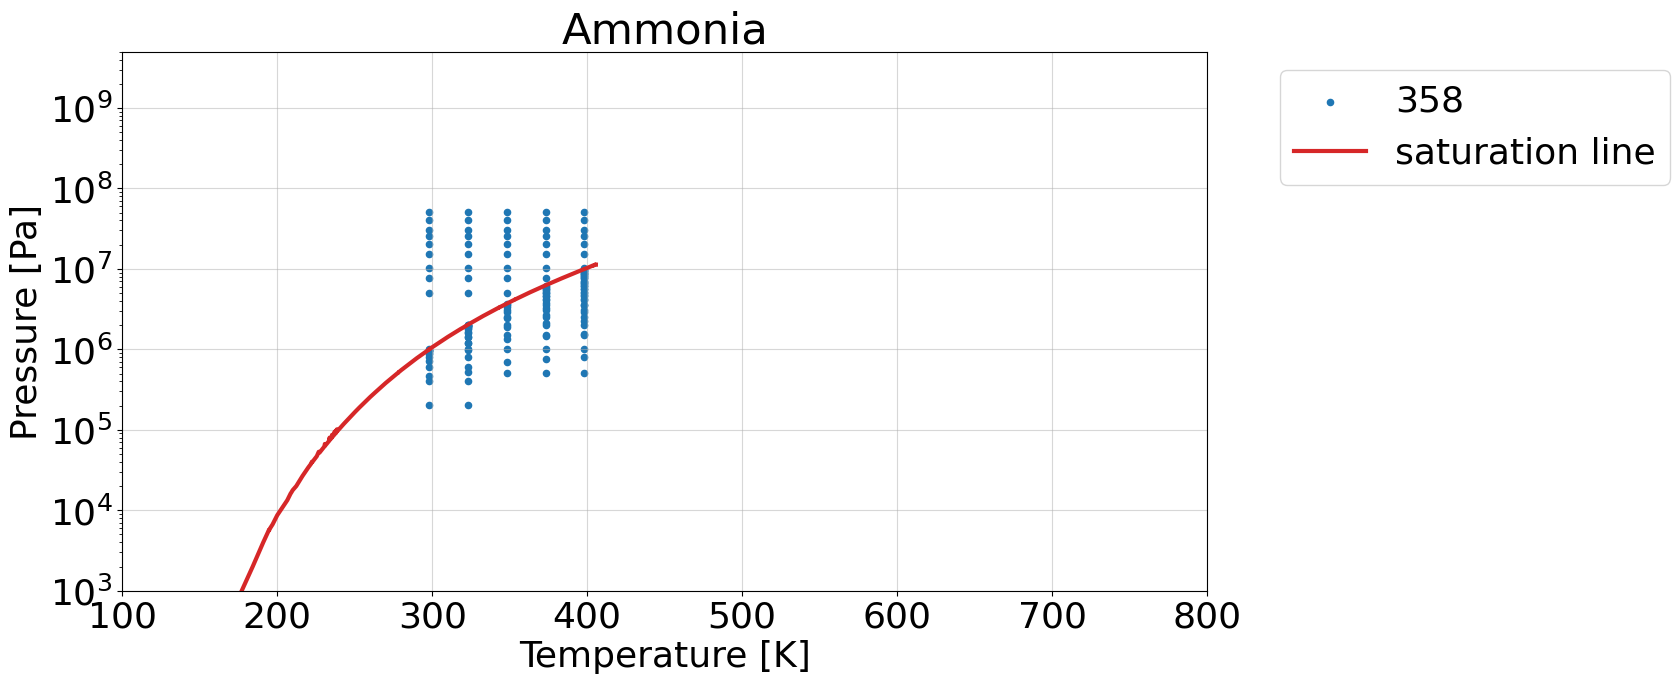

In [1]:
#09/01/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

#data
paper = 358
df = pd.read_excel("dataframes/ammonia_density.xlsx")
df = df[df["Paper"]==paper]

#saturation data
saturation = pd.read_excel("dataframes/ammonia_saturation.xlsx").sort_values(by=["T"])
saturation_pressure = saturation["P"]
saturation_temperature = saturation["T"]

print(f"total number of points = {len(df)}")
#range of P T rho variables
print("data ranges: ")
print(f"Pressures between: [{min(df['P'])}, {max(df['P'])}]")
print(f"Temperatures between: [{min(df['T'])}, {max(df['T'])}]")
print(f"Densities between: [{min(df['rho'])}, {max(df['rho'])}]")
print("")

#saturation ranges
print("saturation ranges: ")
print(f"Pressures between: [{min(saturation['P'])}, {max(saturation['P'])}]")
print(f"Temperatures between: [{min(saturation['T'])}, {max(saturation['T'])}]")
print("")

#the papers
papers = df["Paper"].unique()

#colors for plot
cmap = plt.get_cmap("tab20")
number = len(papers)
colors = [cmap(i) for i in np.linspace(0, 1, number)]

#plotting
fig, ax = plt.subplots()
points = df.loc[df["Paper"]==paper]

pressure = points["P"]
temperature = points["T"]

ax.scatter(temperature, pressure, s= 20, label =paper)

ax.plot(saturation_temperature, saturation_pressure, color="tab:red", linewidth=3, alpha=1, label="saturation line")
ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", ylim = (1e3,5e9), xlim = (100, 800), title="Ammonia")

ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))
ax.grid(alpha=0.5)
plt.show()



## Experimental data: color according to density value

total number of points = 4224
data ranges: 
Pressures between: [6079.0, 950000000.0]
Temperatures between: [195.48, 723.15]
Densities between: [0.1990364470446495, 828.7]

saturation ranges: 
Pressures between: [133.322, 11302803.75]
Temperatures between: [159.8, 405.6]



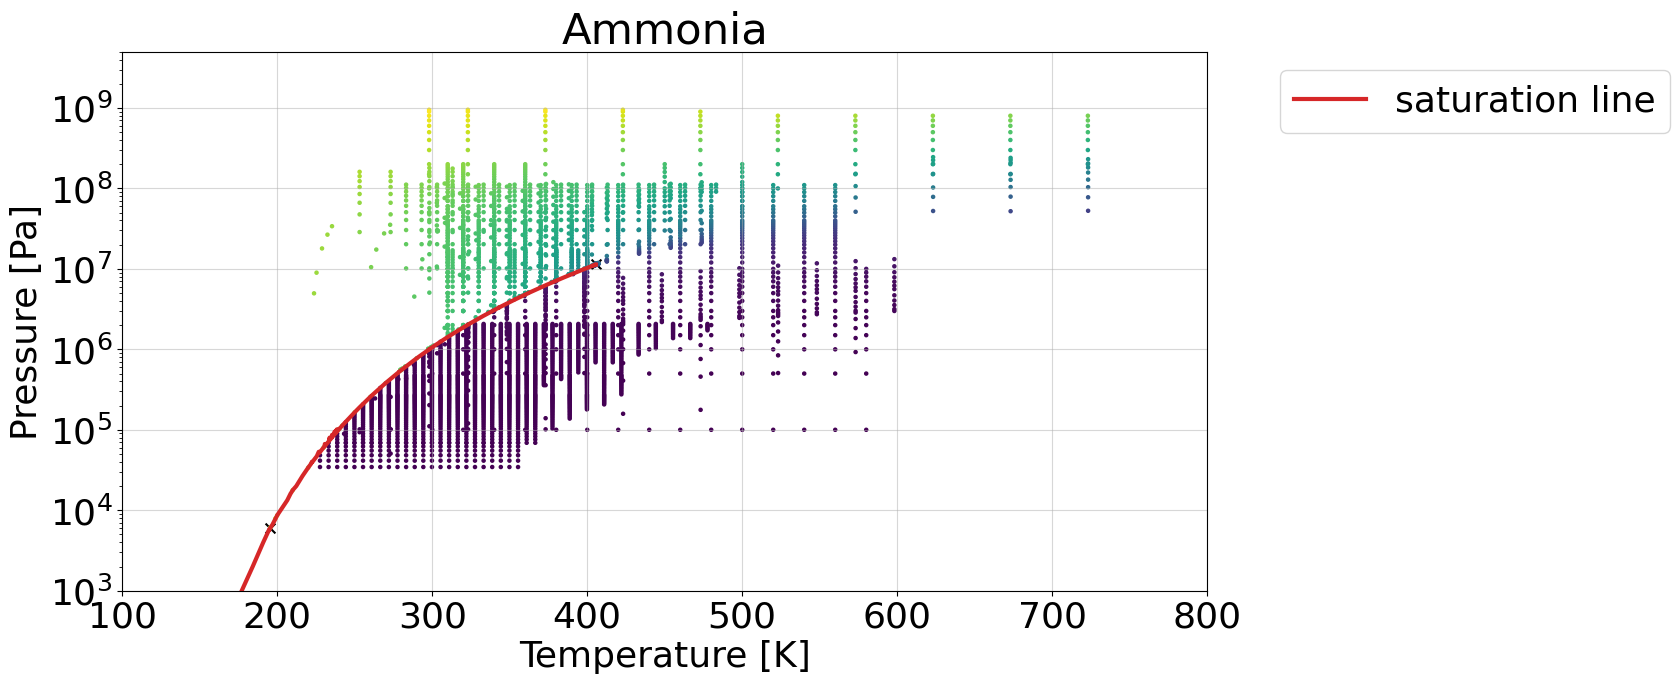

In [13]:
#09/01/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from purefluid import NH3

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

#data
df = pd.read_excel("dataframes/ammonia_density.xlsx")

#saturation data
saturation = pd.read_excel("dataframes/ammonia_saturation.xlsx").sort_values(by=["T"])
saturation_pressure = saturation["P"]
saturation_temperature = saturation["T"]

print(f"total number of points = {len(df)}")
#range of P T rho variables
print("data ranges: ")
print(f"Pressures between: [{min(df['P'])}, {max(df['P'])}]")
print(f"Temperatures between: [{min(df['T'])}, {max(df['T'])}]")
print(f"Densities between: [{min(df['rho'])}, {max(df['rho'])}]")
print("")

#saturation ranges
print("saturation ranges: ")
print(f"Pressures between: [{min(saturation['P'])}, {max(saturation['P'])}]")
print(f"Temperatures between: [{min(saturation['T'])}, {max(saturation['T'])}]")
print("")


#plotting
fig, ax = plt.subplots()

# critical and triple point
ax.scatter(NH3.T_c, NH3.P_c, marker="x", color="black", s= 50)
ax.scatter(NH3.T_t, NH3.P_t, marker="x", color="black", s= 50)

points = df

pressure = points["P"]
temperature = points["T"]
density = points["rho"]

ax.scatter(temperature, pressure, c=density, s= 5)

ax.plot(saturation_temperature, saturation_pressure, color="tab:red", linewidth=3, alpha=1, label="saturation line")
ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", ylim = (1e3,5e9), xlim = (100, 800), title="Ammonia")



ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))
ax.grid(alpha=0.5)
plt.show()

